<a href="https://colab.research.google.com/github/GabrielaRomoM/DIP-2024-2/blob/main/Parciales/Parcial1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procesamiento Digital de Imágenes 2024-2 : PARCIAL 1

Gabriela Romo Mendoza - CC 1080691539

Profesor: Diego Armando Pérez

#Librerias y descarga de imágenes

In [40]:
# import shutil
# shutil.rmtree('/content/DIP-2024-2')

In [41]:
!git clone https://github.com/GabrielaRomoM/DIP-2024-2.git

Cloning into 'DIP-2024-2'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 91 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 26.42 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from IPython.display import display, Image
from skimage.morphology import rectangle
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color,exposure, img_as_float, data
from skimage.color import gray2rgb
from skimage.color import rgb2gray,rgba2rgb

In [42]:
# Cargar imagenes
caramelos = mpimg.imread('/content/DIP-2024-2/Images/m&m.jpeg')
llaves = mpimg.imread('/content/DIP-2024-2/Images/Llaves.jpg')
cafe = mpimg.imread('/content/DIP-2024-2/Images/cafe.jpg')
figs = mpimg.imread('/content/DIP-2024-2/Images/Imagen.jpg')
clock = mpimg.imread('/content/DIP-2024-2/Images/clock2.jpg')
ball = mpimg.imread('/content/DIP-2024-2/Images/balls.png')
girl = mpimg.imread('/content/DIP-2024-2/Images/lena_noise.png')
cars = mpimg.imread('/content/DIP-2024-2/Images/cars.jpg')

# Gráficar Imágenes

In [4]:
# Función para gráficar solo una imagen
def plot_image(image, title=''):
    """
    Muestra una imagen utilizando Matplotlib.
    Parámetros: image (array): La imagen a mostrar.
                title (str): Título opcional para la imagen.
    Retorna: None
    """
    pylab.title(title, size=8) # Establece el título de la imagen
    pylab.imshow(image) # Muestra la imagen
    pylab.axis('off')

# Función para graficar un conjunto de imagenes
def plot_images(figsizex,figsizey,*images, titles=None):
  """
  Muestra múltiples imágenes en un diseño organizado utilizando Matplotlib.
  Parámetros: figsizex (float): Ancho de la figura en pulgadas.
              figsizey (float): Altura de la figura en pulgadas.
              *images (array): Conjunto de imágenes a mostrar.
              titles (list): Lista de títulos para las imágenes (Opcional).
  Retorna: None.
  """
  pylab.figure(figsize=(figsizex,figsizey))
  for image in range(len(images)):
    pylab.subplot((len(images) + 2 - 1) // 2, 3, image+1)
    pylab.imshow(images[image])
    pylab.axis('off') # Eliminar ejes
    pylab.title(titles[image])
  pylab.subplots_adjust(hspace=0.2, wspace=0.2)
  pylab.show()

# Ejercicio 1

Construir una función debidamente documentada, que reciba un parámetro llamado "color", con el cual se indique los colores de caramelos que se quieren mostrar en la siguiente imagen:

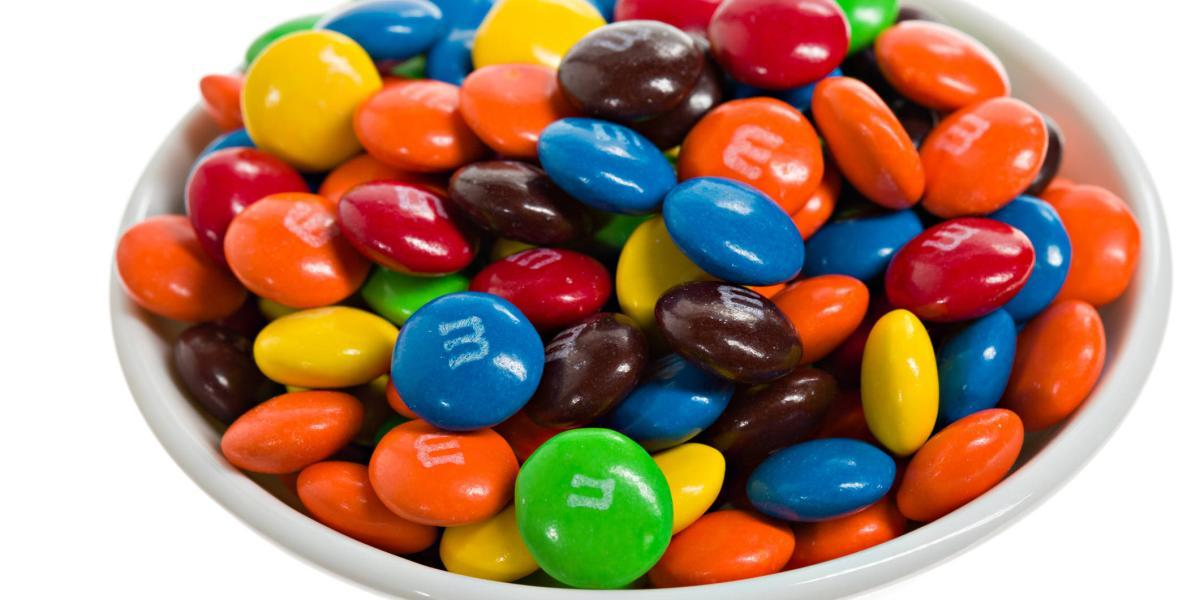

In [5]:
display(Image('/content/DIP-2024-2/Images/m&m.jpeg')) # Mostrar imagen utilizada en el codigo

Los posibles valores que puede tomar el parámetro "color" son:

- Amarillo.
- Verde.
- Azul.
- Purpura.
- Rosado.
- Rojo.
- Naranja.
- Negro
- Café

Todas sus posibles combinaciones. Ej: Rojo y Amarillo, Rojo, Amarillo y Purpura.

## Clasificación de colores

In [6]:
class Color:
  """
  Clase para identificar y procesar diferentes colores en una imagen,
  utilizando el espacio de color HSV y técnicas de operaciones morfológicas.

  Atributos:
  image (array): Imagen en formato RGB que será procesada.
  hsv (array): Representación de la imagen en el espacio de color HSV.
  kernel (array): Kernel para realizar operaciones morfológicas.

  Métodos:
  yellow(): Identifica y procesa los píxeles de color amarillo.
  green(): Identifica y procesa los píxeles de color verde.
  blue(): Identifica y procesa los píxeles de color azul.
  purple(): Identifica y procesa los píxeles de color púrpura.
  pink(): Identifica y procesa los píxeles de color rosado.
  red(): Identifica y procesa los píxeles de color rojo.
  orange(): Identifica y procesa los píxeles de color naranja.
  black(): Identifica y procesa los píxeles de color negro.
  brown(): Identifica y procesa los píxeles de color café.
  """
  def __init__(self,Imagen):
    self.image=np.array(Imagen) #Convertir la imagen a un array
    self.hsv= cv.cvtColor(self.image, cv.COLOR_RGB2HSV) #Convertir la imagen (RGB->HSV)
    self.kernel = np.ones((6, 6), np.uint8) #Kernel para operaciones morfologicas

  def yellow(self):
    # Definir los umbrales inferiores y superiores para el amarillo en HSV
    yellowlw = np.array([20, 100, 100])
    yellowup= np.array([30, 255, 255])
    # Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, yellowlw, yellowup)
    # Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image, mask=mask)
    # Operaciones morfologicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    close= cv.morphologyEx(open, cv.MORPH_CLOSE, self.kernel)
    return close
  def green(self):
    #Definir los umbrales inferiores y superiores para el verde en HSV
    greenlw = np.array([40, 100, 100])
    greenup = np.array([80, 255, 255])
    # Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, greenlw, greenup)
    # Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    # Operaciones morfólogicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    dilate = cv.morphologyEx(open, cv.MORPH_DILATE, self.kernel, iterations=2)
    close= cv.morphologyEx(dilate, cv.MORPH_CLOSE, self.kernel)
    return close
  def blue(self):
    #Definir los umbrales inferiores y superiores para el azul en HSV
    bluelw = np.array([100, 100, 100])
    blueup = np.array([140, 255, 255])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, bluelw, blueup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    dilate = cv.morphologyEx(open, cv.MORPH_DILATE, self.kernel, iterations=2)
    close= cv.morphologyEx(dilate, cv.MORPH_CLOSE, self.kernel)
    return dilate
  def purple(self):
    #Definir los umbrales inferiores y superiores para el purpura en HSV
    purplelw = np.array([130, 50, 50])
    purpleup = np.array([150, 255, 255])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, purplelw, purpleup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    close= cv.morphologyEx(open, cv.MORPH_CLOSE, self.kernel)
    return close
  def pink(self):
    #Definir los umbrales inferiores y superiores para el rosado en HSV
    pinklw = np.array([140, 50, 100])
    pinkup = np.array([170, 255, 255])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, pinklw, pinkup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    close= cv.morphologyEx(open, cv.MORPH_CLOSE, self.kernel)
    return close
  def red(self):
    #Definir los umbrales inferiores y superiores para el rojo en HSV
    redlw = np.array([170, 50, 50])
    redup = np.array([180, 255, 255])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, redlw, redup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    close= cv.morphologyEx(open, cv.MORPH_CLOSE, self.kernel)
    return close
  def orange(self):
    #Definir los umbrales inferiores y superiores para el naranja en HSV
    orangelw = np.array([0, 100, 100])
    orangeup = np.array([10, 255, 255])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, orangelw, orangeup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar el ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    dilate = cv.morphologyEx(open, cv.MORPH_DILATE, self.kernel, iterations=2)
    close= cv.morphologyEx(dilate, cv.MORPH_CLOSE, self.kernel)
    return dilate
  def black(self):
    #Definir los umbrales inferiores y superiores para el negro en HSV
    blacklw = np.array([0, 0, 0])
    blackup = np.array([180, 255, 50])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask = cv.inRange(self.hsv, blacklw, blackup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar el ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    close= cv.morphologyEx(open, cv.MORPH_CLOSE, self.kernel)
    return close
  def brown(self):
    #Definir los umbrales inferiores y superiores para el café en HSV
    brownlw = np.array([0, 0, 0])
    brownup = np.array([50, 225, 110])
    #Máscara que selecciona solo los píxeles dentro de los umbrales
    mask= cv.inRange(self.hsv, brownlw, brownup)
    #Aplicar la máscara a la imagen original
    og = cv.bitwise_and(self.image, self.image,mask=mask)
    #Operaciones morfólogicas para eliminar el ruido
    open = cv.morphologyEx(og, cv.MORPH_OPEN, self.kernel)
    dilate = cv.morphologyEx(open, cv.MORPH_DILATE, self.kernel, iterations=2)
    close= cv.morphologyEx(dilate, cv.MORPH_CLOSE, self.kernel)
    return dilate

## Visualización de Resultados

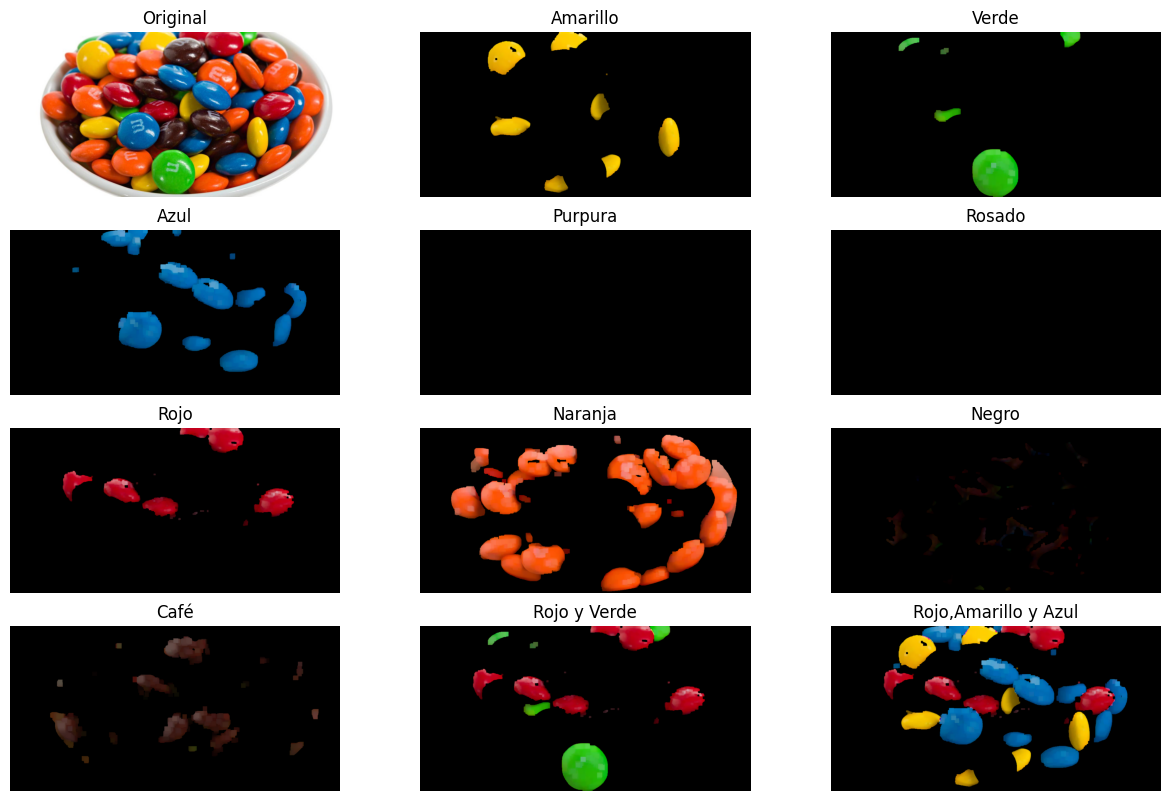

In [7]:
#Instancia de la clase Color pasando la imagen 'caramelos' como parámetro
color = Color(caramelos)
plot_images(15,15,caramelos,color.yellow(), color.green(), color.blue(), color.purple(),
    color.pink(), color.red(), color.orange(), color.black(), color.brown(),
    color.red()+color.green(), color.red()+color.yellow()+color.blue(),
    titles = ['Original','Amarillo', 'Verde', 'Azul', 'Purpura', 'Rosado', 'Rojo', 'Naranja', 'Negro', 'Café',
              'Rojo y Verde', 'Rojo,Amarillo y Azul'])

# Ejercicio 2

Construir una función debidamente documentada, que reciba un parámetro llamado "Operacion_Morfologica", el cual permitirá indicar a cual de los siguientes cuatro estados se quiere llevar la imagen "original". Lo anterior aplicando las cuatro operaciones morfólogicas vistas en clase a pedal, use cualquier imagen.

## Generador de operaciones morfológicas

In [8]:
def morphop(image, height,width ,op=""):
  """
  Realiza operaciones morfológicas básicas (erosión, dilatación, apertura, cierre) en una imagen binaria.
  Parámetros: image (array): Imagen binaria (0s y 1s) sobre la que se aplicará la operación.
              height (int): Altura del elemento estructurante.
              width (int): Ancho del elemento estructurante.
              op (str): Operación morfológica a realizar ('erosion', 'dilation', 'opening', 'closing').
  Retorna: array: Imagen procesada después de la operación morfológica.
  """
  #Copia de la imagen para almacenar el resultado
  result = image.copy()
  #Elemento estructurante rectangular de tamaño (height, width)
  struct_element = np.zeros((height, width), dtype=np.uint8)
  struct_element[:,:] = 1
  #Dimensiones del elemento estructurante
  struct_rows, struct_cols = struct_element.shape
  #Calculo del centro del elemento estructurante
  struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2
  rows, cols = image.shape #Dimensiones de la imagen

  if op == 'erosion':
    for i in range(struct_center_row, rows - struct_center_row):
        for j in range(struct_center_col, cols - struct_center_col):
            #Extraer la región de interés (ROI) alrededor del píxel actual
            roi = image[i - struct_center_row: i + struct_center_row + 1,
                        j - struct_center_col: j + struct_center_col + 1]
            if np.all(roi*struct_element):
            #Verificar si todos los píxeles de la ROI coinciden con el elemento estructurante
                result[i, j] = 1 #Mantener pixel blanco
            else:
                result[i, j] = 0 #Convertir pixel a negro
    return result

  if op == 'dilation':
    for i in range(struct_center_row, rows - struct_center_row):
        for j in range(struct_center_col, cols - struct_center_col):
            roi = image[i - struct_center_row: i + struct_center_row + 1,
                        j - struct_center_col: j + struct_center_col + 1]
            if np.any(roi*struct_element):
                result[i, j] = 1
            else:
                result[i, j] = 0
    return result

  #Operación de apertura (erosión seguida de dilatación)
  if op == 'opening':
    result = morphop(image,height,width,'erosion')
    result = morphop(result,height,width,'dilation')
    return result
  #Operación de cierre (dilatación seguida de erosión)
  if op == 'closing':
    result = morphop(image,height,width,'dilation')
    result = morphop(result,height,width,'erosion')
    return result

## Visualización de Resultados

<Figure size 640x480 with 0 Axes>

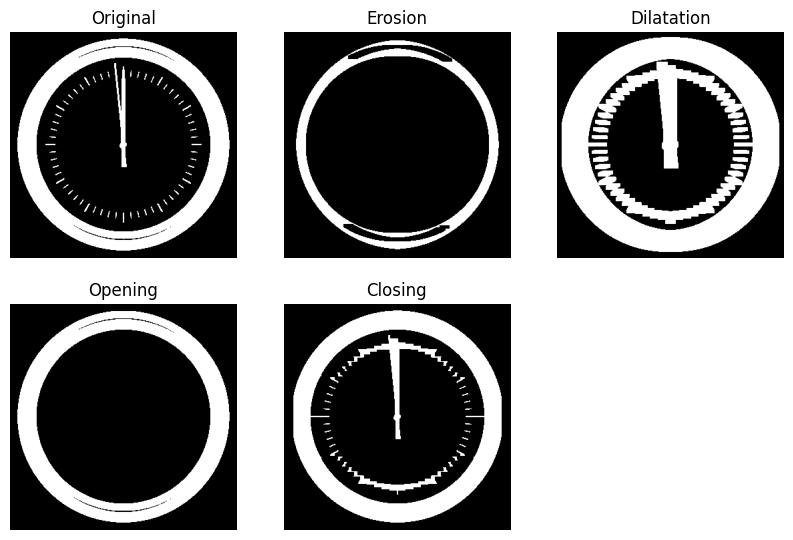

In [9]:
im = rgb2gray(clock) #Convertir la imagen de RGB a escala de grises
im[im <= 0.5] = 0 ; im[im > 0.5] = 1 #Conversión a imagen binaria

#Aplicacion de cada operación morfológica
imerosion = morphop(im, 5, 15, 'erosion') ; imdilation = morphop(im, 5, 15, 'dilation')
imopening = morphop(im, 5, 15, 'opening') ; imclosing = morphop(im, 5, 15, 'closing')

pylab.gray()
plot_images(10,10, im, imerosion, imdilation, imopening, imclosing,
            titles=['Original', 'Erosion', 'Dilatation' ,'Opening', 'Closing'])

# Ejercicio 3
Crear un código que pueda separar los objetos de la imagen por tamaños, permitiendo al usario elegir el tamaño. Para los resutlados mostrar en una sola gráfica dos figuras, una con la imagen original y la otra con el elemento que se eliminó o separó.

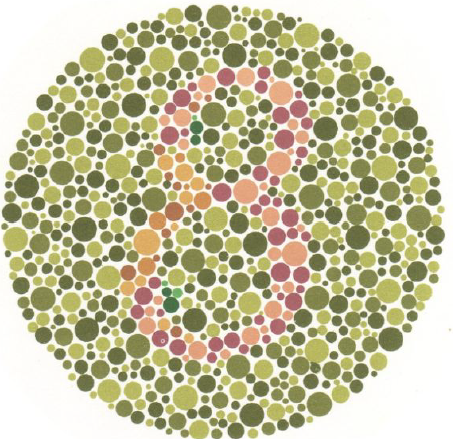

In [10]:
display(Image(filename='/content/DIP-2024-2/Images/balls.png', width=400))

## Código Separador por Tamaño

Tamaños de radio detectados:
Radio: 9.0
Radio: 8.0
Radio: 7.0
Radio: 5.0
Radio: 6.0
Radio: 4.0
Radio: 3.0
Radio: 2.0

Ingrese los radios deseados separados por comas (Ej:2,4,5,6): 2,9

Radios seleccionados:
2.0
9.0



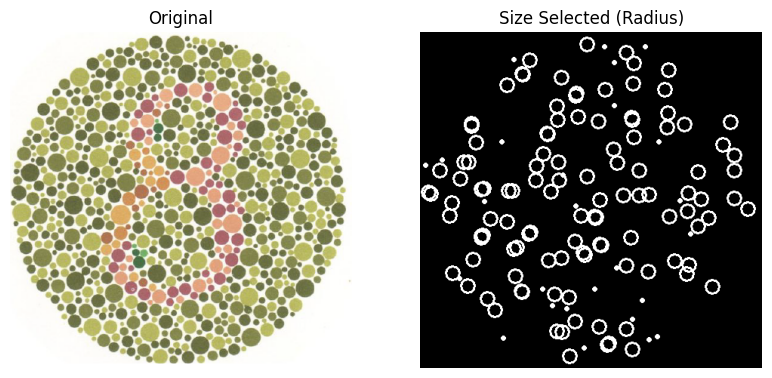

In [19]:
#Leer la imagen de entrada en escala de grises
ballsgray = cv.imread('/content/DIP-2024-2/Images/balls.png', cv.IMREAD_GRAYSCALE)
# Aplicar la Transformada de Hough para detectar círculos en la imagen
circles = cv.HoughCircles(ballsgray, cv.HOUGH_GRADIENT, dp=1, minDist=1,
                          param1=40, param2=10, minRadius=0, maxRadius=10)

# Comprobar si se encontraron círculos en la imagen
if circles is None:
    print("No se encontraron círculos en la imagen.")
else:
    # Inicializar un diccionario para agrupar círculos por tamaño de radio
    csize = {}
    rad = np.around(circles[0, :, 2])  # Redondear los radios detectados a números enteros
     # Agrupar los círculos detectados según sus radios
    for radius in rad:
        if radius in csize:
            csize[radius] += 1 #Incrementar el conteo si el radio ya está en el diccionario
        else:
            csize[radius] = 1 #Agregar el radio al diccionario si no está presente
    print("Tamaños de radio detectados:") #Mostrar los radios detectados
    for radius in csize:
        print(f"Radio: {radius}") #Imprimir cada radio

    # Solicitar al usuario los radios deseados
    print() ; user = input("Ingrese los radios deseados separados por comas (Ej:2,4,5,6): ")
    user = [float(r) for r in user.split(",")] #Convertir en una lista de números flotantes

    # Verificar si los radios ingresados están en los radios detectados
    radios = set(csize.keys())
    invalide = [r for r in user if r not in radios]

    if invalide:
        print("No se detecto/aron el/los tamaño(s) de radio(s).")
    else:
      # Imprimir los círculos seleccionados
      print(); print("Radios seleccionados:")
      for radius in user: print(f"{radius}")

    # Crear una imagen negra con las mismas dimensiones que la original
    imgresult = np.zeros_like(ballsgray)
    # Dibujar solo los círculos seleccionados en la nueva imagen
    for circle in circles[0]:
        center = (int(circle[0]), int(circle[1])) #Coordenadas del centro del círculo
        radius = np.round(circle[2]) #Radio del círculo redondeado
        if radius in user: #Verificar si el radio está en la lista de radios deseados
            cv.circle(imgresult, center, int(radius), (255, 255, 255), thickness=2)  #Color blanco para los círculos

#Mostrar las imágenes original y con los círculos seleccionados
print(); plot_images(15,15,ball,imgresult,titles=['Original','Size Selected (Radius)'])

# Ejercicio 4
Remover el ruido blanco (sal), el ruido negro (pimienta) y ambos ruidos, cada uno graficarlo en una figura diferente (Aplicar subtramas de Matplotlib)

## Adaptación Imagen

In [12]:
imgrgb = rgba2rgb(girl) #Se convierte la imagen RGBA a RGB
imgray=rgb2gray(imgrgb) #Transformación de la imagen a escala de grises
# Conversión a imagen binaria
imgray[imgray<= 0.5] = 0 ; imgray[imgray > 0.5] = 1

## Función salt + pepper

In [13]:
def noise(imagen,height,width):
  """
    Aplica operaciones morfológicas(Opening,Closing) para eliminar el ruido de sal y pimienta de una imagen binaria.
    Parametros: imagen (array): La imagen binaria en formato de matriz.
                height (int): La altura del elemento estructural(rectangle) para las operaciones morfológicas.
                width (int): El ancho del elemento estructural(rectangle) para las operaciones morfológicas.
    Retorna: array: La imagen resultante después de aplicar las operaciones de apertura y cierre.
  """
  imagen=np.array(imagen)
  #Se aplica una operación de apertura para eliminar el ruido de sal.
  salt=morphop(imagen,height,width,'opening')
  #Se aplica una operación de cierre para eliminar el ruido de pimienta.
  pepper=morphop(salt,height,width,'closing')
  return pepper

## Visualización imagenes

(<Axes: title={'center': 'Removing Salt + Removing pepper'}>,
 None,
 (-0.5, 350.5, 348.5, -0.5))

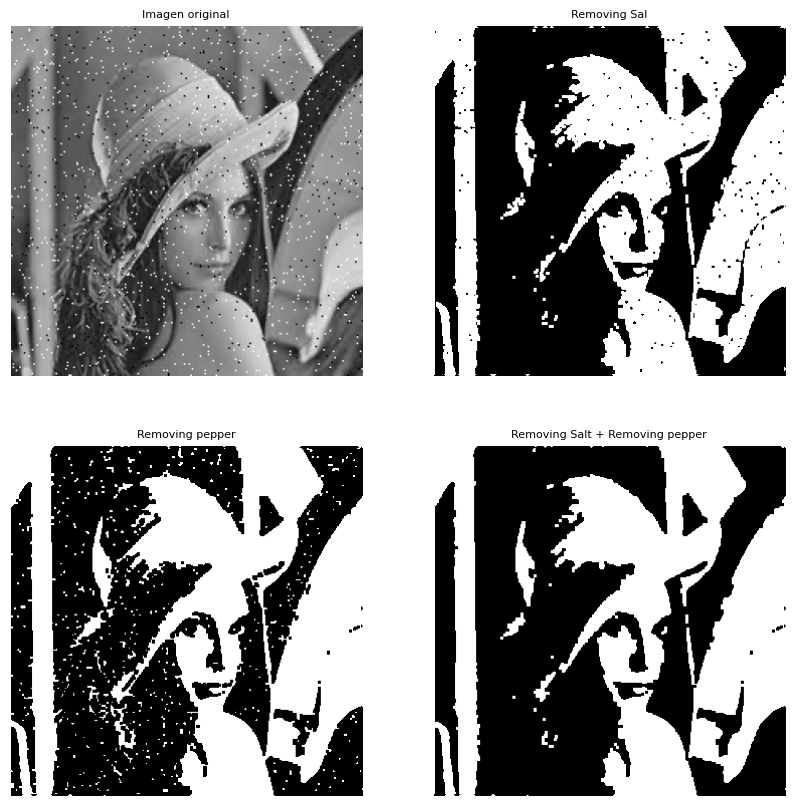

In [14]:
#Crear una figura con 4 subtramas para visualizar las imágenes
pylab.figure(figsize=(10, 10))
# Subtrama 1: Imagen original
pylab.subplot(221), plot_image(girl,"Imagen original"), pylab.axis('off')
# Subtrama 2: Resultado de la operación de apertura (elimina el ruido de sal)
pylab.subplot(222), plot_image(morphop(imgray, 3, 3, 'opening'), "Removing Sal"), pylab.axis('off')
# Subtrama 3: Resultado de la operación de cierre (elimina el ruido de pimienta)
pylab.subplot(223), plot_image(morphop(imgray, 3, 3, 'closing'), "Removing pepper"), pylab.axis('off')
# Subtrama 4: Resultado de aplicar ambas operaciones (elimina el ruido de sal y pimienta)
pylab.subplot(224), plot_image(noise(imgray, 3, 3), "Removing Salt + Removing pepper"), pylab.axis('off')

# Ejercicio 5

Cree una clase en Python que acepte una imagen en escala de grises como entrada y proporcione métodos para aplicar varios filtros de procesamiento de imágenes, incluyendo Sobel, Scharr, Laplace, Roberts, Prewitt y un filtro personalizado todo esto sin usar librerías, **operación a Pedal**.(10%)

**Requisitos:**

1. **Clase de Procesamiento de Imágenes:**
   - Cree una clase llamada `ImageProcessor` que acepte una imagen en escala de grises como entrada durante la inicialización de la clase.
   - La imagen se puede representar como una matriz NumPy 2D, donde cada elemento de la matriz corresponde a un píxel en la imagen en escala de grises.

2. **Métodos de Filtros:**
   - Implemente métodos dentro de la clase `ImageProcessor` para aplicar los siguientes filtros:
     - Filtro Sobel.
     - Filtro Scharr.
     - Filtro Laplace.
     - Filtro Roberts.
     - Filtro Prewitt.
     - Filtro personalizado: Permita que el usuario defina una matriz de convolución personalizada y aplique el filtro a la imagen.

3. **Resultado de los Filtros:**
   - Los métodos de filtros deben devolver una nueva imagen en escala de grises que representa el resultado de aplicar el filtro correspondiente.
   - La nueva imagen se puede representar como una matriz NumPy 2D.

4. **Documentación y Ejemplos:**
   - Proporcione documentación clara y comentarios en el código para explicar cómo usar la clase `ImageProcessor` y sus métodos.
   - Proporcione ejemplos de cómo cargar una imagen en escala de grises, crear una instancia de la clase `ImageProcessor` y aplicar los diferentes filtros.


## Clase para aplicación de filtros

In [32]:
class ImageProcessor:
    """
    Clase para aplicar filtros y operaciones de procesamiento a imágenes en escala de grises.
    """
    def __init__(self,grayimg):
      """
      Inicializa la clase ImageProcessor con una imagen en escala de grises.

      Parametros: grayimg (numpy.ndarray): Imagen en escala de grises.
                  img_height (int): Altura de la imagen.
                  img_width (int): Ancho de la imagen.
      """
      self.grayimg= np.array(grayimg)
      self.img_height, self.img_width = self.grayimg.shape

    def kernel(self,kernelfilt):
      """
      Realiza la convolución de la imagen con un kernel dado.
      Parametros:kernelfilt (numpy.ndarray): Kernel de filtrado (matriz).
      Retorna: numpy.ndarray: Imagen resultante después de aplicar la convolución.
      """
      imgout = np.zeros_like(self.grayimg)
      # Obtener las dimensiones de la imagen y el kernel
      kernelh, kernelw = kernelfilt.shape
      # Calcular el desplazamiento necesario para que el kernel no se salga de la imagen
      padh = kernelh // 2 ; padw = kernelw // 2
      # Realizar la convolución deslizando el kernel sobre la imagen
      for i in range(padh, self.img_height - padh):
          for j in range(padw, self.img_width - padw):
      # Multiplicar los elementos de la imagen cubiertos por el kernel con los valores del kernel
            sum = 0
            for m in range(kernelh):
              for n in range(kernelw):
                sum += self.grayimg[i - padh + m, j - padw + n] * kernelfilt[m, n]
              # Asignar el resultado al píxel correspondiente en la imagen de salida
              imgout[i, j] = sum
      return imgout

    def custom_filter(self):
        """
        Solicita al usuario ingresar el kernel de manera interactiva (valor por posición).
        Retorna: numpy.ndarray: Kernel personalizado ingresado por el usuario.
        """
        try:
           #Solicitar número de filas y de columnas del kernel
            rows = int(input("Ingrese el # de filas del kernel: "))
            cols = int(input("Ingrese el # de columnas del kernel: "))
            kernel = []
           #Solicitar al usuario que ingrese los valores del kernel
            print(f"Ingrese los valores del kernel:")
            for i in range(rows):
                row = []
                for j in range(cols):
                    while True:
                            value = float(input(f"Valor en posición ({i + 1}, {j + 1}): "))
                            row.append(value)
                            break
                kernel.append(row)
            kernel = np.array(kernel)
            return kernel
        except ValueError as e:
            print(f"Entrada inválida: {e}. Inténtelo de nuevo.")
            return self.custom_filter()

    def apply_sobel(self):
        """
        Aplica el filtro de Sobel a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro de Sobel.
        """
        # Se definen los kernels Sobel en los ejes x y y
        sobel_x=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        sobel_y=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        # Aplicar la convolución con los kernels de Sobel y combinar los resultados
        img_result = np.clip(self.kernel(sobel_x)+self.kernel(sobel_y),0,1)
        return img_result

    def apply_scharr(self):
        """
        Aplica el filtro de Scharr a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro de Scharr.
        """
        # Se definen los kernels Scharr en los ejes x y y
        scharr_x=np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
        scharr_y=np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
        # Aplicar la convolución con los kernels de Scharr y combinar los resultados
        img_result = np.clip(self.kernel(scharr_x)+self.kernel(scharr_y),0,1)
        return img_result

    def apply_laplace(self):
        """
        Aplica el filtro de Laplace a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro de Laplace.
        """
        # Se define el kernel laplaciano en el eje x
        laplace_x=np.array([[0,1,0],[1,4,1],[0,1,0]])
        # Aplicar la convolución con el kernel de Laplace
        img_result = np.clip(self.kernel(laplace_x),0,1)
        return img_result

    def apply_roberts(self):
        """
        Aplica el filtro de Roberts a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro de Roberts.
        """
        # Se definen los kernels Roberts en los ejes x y y
        roberts_x=np.array([[1,0],[0, -1]])
        roberts_y=np.array([[0,-1],[1, 0]])
        # Aplicar la convolución con los kernels de Roberts y combinar los resultados
        img_result = np.clip(self.kernel(roberts_x)+self.kernel(roberts_y),0,1)
        return img_result

    def apply_prewitt(self):
        """
        Aplica el filtro de Prewitt a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro de Prewitt.
        """
        # Se definen los kernels Prewitt en los ejes x y y
        prewitt_x=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        prewitt_y=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        # Aplicar la convolución con los kernels de Prewitt y combinar los resultados
        img_result = np.clip(self.kernel(prewitt_x) + self.kernel(prewitt_y),0,1)
        return img_result

    def apply_customfilter(self):
        """
        Aplica un filtro de personalizado a la imagen.
        Return: numpy.ndarray: La imagen filtrada con el filtro personalizado.
        """
        # Se define el kernel del filtro personalizado
        custom_filter = self.custom_filter()
        # Aplicar la convolución con el kernel personalizado
        img_result = np.clip(self.kernel(custom_filter),0,1)
        return img_result

## Visualización de imagenes resultantes

Ingrese el # de filas del kernel: 3
Ingrese el # de columnas del kernel: 3
Ingrese los valores del kernel:
Valor en posición (1, 1): -1
Valor en posición (1, 2): 1
Valor en posición (1, 3): -1
Valor en posición (2, 1): -1
Valor en posición (2, 2): -4
Valor en posición (2, 3): -1
Valor en posición (3, 1): 1
Valor en posición (3, 2): 0
Valor en posición (3, 3): 1


<Figure size 640x480 with 0 Axes>

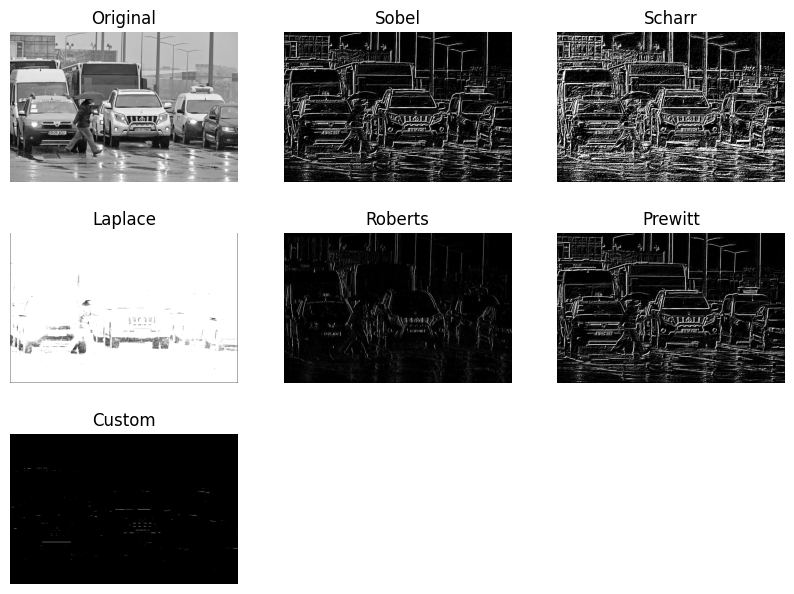

In [46]:
# Lectura de la imagen a filtrar
imgfilt =rgb2gray(cars) ; pylab.gray()

#Creamos una instancia de ImageProcessor con la imagen en escala de grises
processor = ImageProcessor(imgfilt)
sobel = processor.apply_sobel() ; scharr = processor.apply_scharr();
laplace = processor.apply_laplace() ; roberts = processor.apply_roberts() ;
prewitt = processor.apply_prewitt() ; custom = processor.apply_customfilter()

plot_images(10,10,imgfilt,sobel,scharr,laplace,roberts,prewitt,custom,
            titles=['Original','Sobel','Scharr','Laplace','Roberts','Prewitt','Custom'])